# **LADISLAO JORGE MAMANI PUMAYLLE**
## En este proyecto se usaron la base de datos "diabetes" y "Advertising" los cuales lo encontramos en este repositorio.

In [2]:
import pandas as pd
data1=pd.read_csv("/content/diabetes.csv")
data1

FileNotFoundError: [Errno 2] No such file or directory: '/content/diabetes.csv'

In [ ]:
#Separamos las variables predictoras de la variable de clasificación
v_numericas=data1.select_dtypes(["float64","int64"]).drop(["Outcome"],axis=1)
v_numericas=list(v_numericas)
v_numericas

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
#Almacenamos en un objeto las variables predictoras y la de clasificación
X=data1[v_numericas]
y=data1["Outcome"]

In [ ]:
#Tomamos 80% de los datos para entrenamiento y 20% para prueba
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#Estandarizamos datos
from sklearn.preprocessing import StandardScaler
data_estand=StandardScaler()
X_train=data_estand.fit_transform(X_train)
X_test=data_estand.transform(X_test)

In [ ]:
#Ajuste de hiperparámetros con validación cruzada para el modelo SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np


In [ ]:
param_grid={"C":np.array([1,2,5]),"gamma":np.array(["scale","auto"])}
kfold=StratifiedKFold(n_splits=4)
grid=GridSearchCV(estimator=SVC(),param_grid=param_grid,
                  scoring="accuracy",cv=kfold)
grid_result=grid.fit(X_train,y_train)
grid_result.best_params_


{'C': 2, 'gamma': 'auto'}

In [ ]:
#Importamos todas las funcionesnecesarias para entrenar diferentes modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (VotingClassifier,BaggingClassifier,
                              AdaBoostClassifier,StackingClassifier)

In [ ]:
#Almacenamos los modelos dentro de una lista
modelos=[]
modelos.append(("SVC",SVC(C=2,gamma="auto")))
modelos.append(("k-NN",KNeighborsClassifier(n_neighbors=20)))
modelos.append(("RL",LogisticRegression()))
modelos.append(("DTC",DecisionTreeClassifier()))
modelos.append(("RFC",RandomForestClassifier(n_estimators=1000)))
modelos.append(("NB",GaussianNB()))
estimators=modelos[0:5]
modelos.append(("Voting",VotingClassifier(estimators=estimators,voting="hard")))
modelos.append(("Bagging",BaggingClassifier(n_estimators=1000)))
modelos.append(("Boosting",AdaBoostClassifier(n_estimators=500,learning_rate=1)))
modelos.append(("Stacking",StackingClassifier(estimators=estimators,
                                              final_estimator=LogisticRegression())))
modelos

[('SVC', SVC(C=2, gamma='auto')),
 ('k-NN', KNeighborsClassifier(n_neighbors=20)),
 ('RL', LogisticRegression()),
 ('DTC', DecisionTreeClassifier()),
 ('RFC', RandomForestClassifier(n_estimators=1000)),
 ('NB', GaussianNB()),
 ('Voting',
  VotingClassifier(estimators=[('SVC', SVC(C=2, gamma='auto')),
                               ('k-NN', KNeighborsClassifier(n_neighbors=20)),
                               ('RL', LogisticRegression()),
                               ('DTC', DecisionTreeClassifier()),
                               ('RFC',
                                RandomForestClassifier(n_estimators=1000))])),
 ('Bagging', BaggingClassifier(n_estimators=1000)),
 ('Boosting', AdaBoostClassifier(learning_rate=1, n_estimators=500)),
 ('Stacking',
  StackingClassifier(estimators=[('SVC', SVC(C=2, gamma='auto')),
                                 ('k-NN', KNeighborsClassifier(n_neighbors=20)),
                                 ('RL', LogisticRegression()),
                            

In [ ]:
#Aplicaremos validación cruzada para cada modelo en el entrenamiento
#Calculamos sus métricas
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, accuracy_score
resultados1=[]
nombres=[]
for nombre, modelo in modelos:
  print(f"\n Empezando a entrenar el modelo {nombre}...\n")
  kFold=KFold(n_splits=5)
  cv_resultados=cross_val_score(modelo,X_train,y_train,cv=kfold,scoring="accuracy")
  modelo.fit(X_train,y_train)
  resultados1.append(cv_resultados)
  nombres.append(nombre)
  msg=" %s: %f (%f)" % (nombre,cv_resultados.mean(),cv_resultados.std())
  print(f"######Reporte de clasificación para {modelo} #########")
  y_pred=modelo.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(msg)
  print(f"Accuracy: {accuracy_score(y_test,y_pred)}")


 Empezando a entrenar el modelo SVC...

######Reporte de clasificación para SVC(C=2, gamma='auto') #########
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       107
           1       0.68      0.55      0.61        47

    accuracy                           0.79       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154

 SVC: 0.745957 (0.014735)
Accuracy: 0.7857142857142857

 Empezando a entrenar el modelo k-NN...

######Reporte de clasificación para KNeighborsClassifier(n_neighbors=20) #########
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154

 k-NN: 0.742721 (0.017972)
Accuracy: 0.7922077922077922


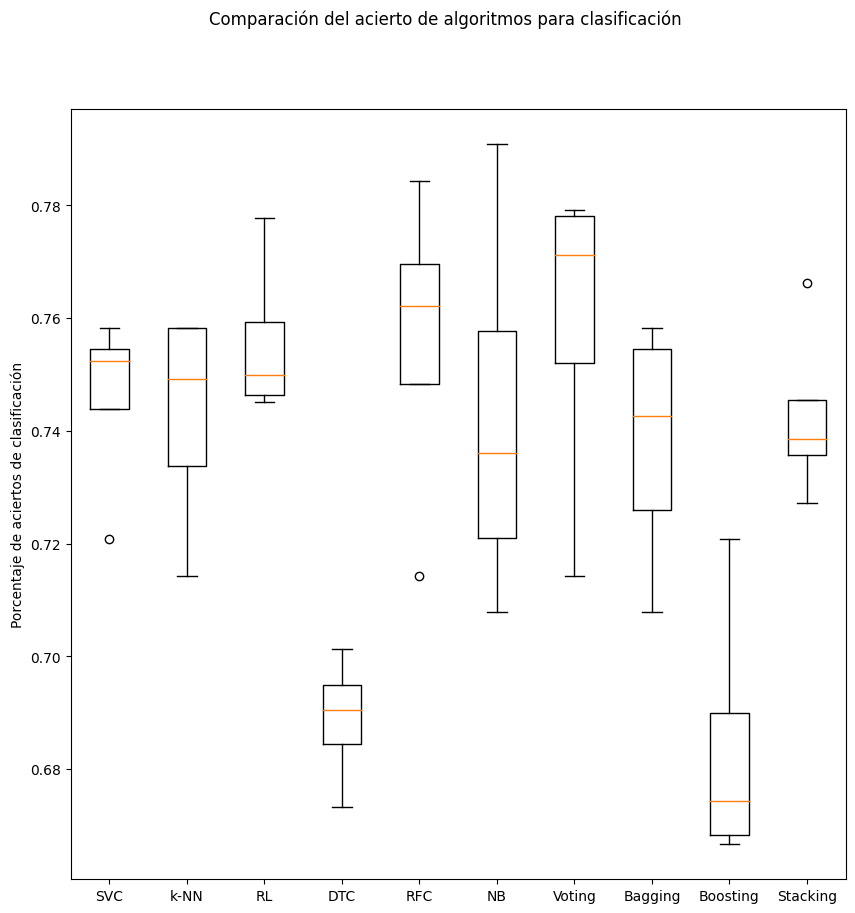

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
fig.suptitle("Comparación del acierto de algoritmos para clasificación")
ax=fig.add_subplot(111)
plt.boxplot(resultados1)
ax.set_xticklabels(nombres)
ax.set_ylabel("Porcentaje de aciertos de clasificación")
plt.show()

# **ENSAMBLE CON DIFERENTES MODELOS DE REGRESIÓN**

In [3]:
#Leyendo el dataset
data2=pd.read_csv("/content/Advertising.csv")
data2

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
#Separando variables independiente de la dependiente
X=data2[["TV","Radio","Newspaper"]]
y=data2["Sales"]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [9]:
#Importamos todas las funcionesnecesarias para entrenar diferentes modelos
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import (VotingRegressor,BaggingRegressor,
                              AdaBoostRegressor,StackingRegressor)


In [10]:
#Almacenamos todos los modelos en una lista
modelos=[]
modelos.append(("SVR",SVR(C=1,gamma="scale")))
modelos.append(("Regresión Lineal",LinearRegression()))
modelos.append(("DTR",DecisionTreeRegressor()))
modelos.append(("RFR",RandomForestRegressor(n_estimators=7000)))
estimators=modelos[0:4]
modelos.append(("Voting",VotingRegressor(estimators=estimators)))
modelos.append(("Bagging",BaggingRegressor(n_estimators=750)))
modelos.append(("Boosting",AdaBoostRegressor(n_estimators=500,learning_rate=1,random_state=123)))
modelos.append(("Stacking",StackingRegressor(estimators=estimators,n_jobs=-1)))
modelos

[('SVR', SVR(C=1)),
 ('Regresión Lineal', LinearRegression()),
 ('DTR', DecisionTreeRegressor()),
 ('RFR', RandomForestRegressor(n_estimators=7000)),
 ('Voting',
  VotingRegressor(estimators=[('SVR', SVR(C=1)),
                              ('Regresión Lineal', LinearRegression()),
                              ('DTR', DecisionTreeRegressor()),
                              ('RFR', RandomForestRegressor(n_estimators=7000))])),
 ('Bagging', BaggingRegressor(n_estimators=750)),
 ('Boosting',
  AdaBoostRegressor(learning_rate=1, n_estimators=500, random_state=123)),
 ('Stacking',
  StackingRegressor(estimators=[('SVR', SVR(C=1)),
                                ('Regresión Lineal', LinearRegression()),
                                ('DTR', DecisionTreeRegressor()),
                                ('RFR',
                                 RandomForestRegressor(n_estimators=7000))],
                    n_jobs=-1))]

In [11]:
# CReamos un diccionario con las métricas que evaluaremos
scoring={"mean_squared_error":"neg_mean_squared_error",
         "neg_root_mean_squared_error":"neg_root_mean_squared_error",
         "mean_absolute_error":"neg_mean_absolute_error", "r2":"r2"}
scoring

{'mean_squared_error': 'neg_mean_squared_error',
 'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
 'mean_absolute_error': 'neg_mean_absolute_error',
 'r2': 'r2'}

In [16]:
#Aplicamos validación cruzada y calculamos las métricas de desempeño
from sklearn.model_selection import cross_validate
resultados2=[]
nombres=[]
for nombre, modelo in modelos:
  print(f"\nEmpezando a entrenar el modelo {nombre}...\n")
  cv_resultados=cross_validate(modelo,X_train, y_train,cv=7,
                               scoring=scoring, n_jobs=-1)
  print(f" Error cuadrático medio: {str(-cv_resultados['test_mean_squared_error'].mean())}")
  print(f" Raíz del error cuadrático medio: {str(-cv_resultados['test_neg_root_mean_squared_error'].mean())}")
  print(f" Error absoluto medio: {str(-cv_resultados['test_mean_absolute_error'].mean())}")
  print(f" Coeficiente de determinación: {str(cv_resultados['test_r2'].mean())}")
  resultados2.append(cv_resultados)


Empezando a entrenar el modelo SVR...

 Error cuadrático medio: 5.041165036623188
 Raíz del error cuadrático medio: 2.2184261201622
 Error absoluto medio: 1.6698792391340433
 Coeficiente de determinación: 0.8003888615069885

Empezando a entrenar el modelo Regresión Lineal...

 Error cuadrático medio: 2.6298356536131533
 Raíz del error cuadrático medio: 1.5967078262939916
 Error absoluto medio: 1.2592672130731282
 Coeficiente de determinación: 0.8946558038233023

Empezando a entrenar el modelo DTR...

 Error cuadrático medio: 1.545118577075099
 Raíz del error cuadrático medio: 1.2297230111020878
 Error absoluto medio: 0.9675042348955393
 Coeficiente de determinación: 0.9338540909765626

Empezando a entrenar el modelo RFR...

 Error cuadrático medio: 0.6461107058580381
 Raíz del error cuadrático medio: 0.7985801207753497
 Error absoluto medio: 0.6371249052190227
 Coeficiente de determinación: 0.9730221295474311

Empezando a entrenar el modelo Voting...

 Error cuadrático medio: 1.068688